#**CS 5350 - Homework 2**
## Perceptron Algorithm and Friends
<br>

**Train set statistics:**
1084 (-1), 1146 (1), 2230 Total Examples

<br>

**Test Set Statistics:**
255 (-1), 303 (1), 558 Total Examples


#**Data Wrangling & Imports**

## Imports

In [609]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#lucky seed
random.seed(777)

## Data Initialization

In [610]:
#simple train/test
train = pd.read_csv("train.csv", header=None)
eval = pd.read_csv("test.csv", header=None)

#folds for later
folds = ["fold1.csv", "fold2.csv", "fold3.csv", "fold4.csv", "fold5.csv"]

In [611]:
def xy_split(df):
  x_split = train.iloc[:,1:] #x features
  y_split = train.iloc[:,0] #labels

  return x_split, y_split

## K-fold Cross Validation

In [612]:
def FoldSelection(folds):
  #make a copy of folds just in case
  fold_cp = list(folds)
  
  #choose a testing fold at random
  #will work for more than k = 5
  test_index = random.randrange(0,len(folds))
  test_fold = fold_cp[test_index]
  test_df = pd.read_csv(test_fold, header=None)

  #rest are training folds
  fold_cp.remove(test_fold)

  #collect and concat into single df
  train_df = []
  for f in fold_cp:
    df = pd.read_csv(f, header=None)
    train_df.append(df)

  train_df = pd.concat(train_df, ignore_index=True)

  x_train, y_train = xy_split(train_df)
  x_test, y_test = xy_split(test_df)

  return x_train, y_train, x_test, y_test

In [613]:
def Accuracy(predictions, labels):
  correct = 0

  for i in range(len(labels)):

    if labels[i] == predictions[i]:
      correct += 1
    
  return correct / float(len(labels)) * 100.0, correct, predictions.shape[0]

# **Simple Perceptron**

## Simple Perceptron Functions

In [614]:
#finds the weights and bias
def train_weights_simple(features, labels, lr, epochs, test_features, test_labels):
  print("----------------------------------------------------------------------")
  print(f"Simple Perceptron Training - epochs: {epochs}, lr: {lr}")
  print("----------------------------------------------------------------------")

  x = features.to_numpy(copy=True)
  y = labels.to_numpy(copy=True)
  test_x = test_features.to_numpy(copy=True)
  test_y = test_labels.to_numpy(copy=True)

  acc = 0
  e = 0 

  best_acc = 0
  best_epoch = 0
  updates = 0
  best_updates = 0

  length = x.shape[1]
  acc_dat = []

  w, b = initialize_weights(length)

  for e in range(1, epochs+1):
    for i in range(x.shape[0]-1):

      y_prime = predict(x[i,0:length], w, b)
      
      if y_prime < 0 and y[i] > 0:
        w, b = update_weights(w, b, x[i, 0:length], y[i], lr)
        updates = updates + 1
      
      if y_prime > 0 and y[i] < 0:
        w, b = update_weights(w, b, x[i, 0:length], y[i], lr)
        updates = updates + 1

    predictions = perceptron_simple(test_x, w, b)
    acc, right, total = Accuracy(predictions, test_y)
    acc_dat.append(acc)

    if acc > best_acc:

      best_acc = acc
      best_epoch = e
      best_w = np.copy(w)
      best_b = b
      best_updates = updates

    print(f"Epoch {e}: Accuracy {acc},  Error: {100-acc}")

  print("---------------------------------------------------------------------------------------------------------------")
  print(f"Learning rate = {lr}")
  print(f"Final Results - Accuracy: {acc} Ratio: {right}/{total} on epoch: {e} Total Updates: {updates}")
  print(f"Best  Results - Accuracy: {best_acc} on epoch: {best_epoch} Updates to reach highest accuracy: {best_updates} ")
  print(f"")
  print("---------------------------------------------------------------------------------------------------------------")
  print()

  return best_w, best_b, acc_dat

  

In [615]:
#initialize weights and bias with random numbers between -.01 and .01 of some length
def initialize_weights(length):
  w = np.zeros((length, 1))

  for i in range(length):
    rand = (random.random() - .5) / 50
    

    w[i, 0] = rand

  return np.array(w), (random.random() - .5)/50

def update_weights(w, b, x, y, lr):
  w = w.T

  w = w + lr * y * x
  b = b + lr * y
  
  return w.T, b

In [616]:
def predict(x, w , b):  
  return x.dot(w) + b

In [617]:
def perceptron_simple(x, w, b):
  
  length = x.shape[1]
  predictions = np.zeros((x.shape[0], 1))

  for i in range(len(x)):
    pred = predict(x[i,0:length], w, b)

    if pred > 0:
      predictions[i] = 1
    else:
      predictions[i] = -1
  
  return predictions


##Hyper Parameter Tuning

In [618]:
epochs = 20
#lr 1
lr = 1
x_train, y_train, x_test, y_test = FoldSelection(folds)
w1, b1, ad1 = train_weights_simple(x_train, y_train, lr, epochs, x_test, y_test)


print()
#lr .1
lr = .1
x_train, y_train, x_test, y_test = FoldSelection(folds)
w2, b2, ad2 = train_weights_simple(x_train, y_train, lr, epochs, x_test, y_test)
print()

#lr .01
lr = .01
x_train, y_train, x_test, y_test = FoldSelection(folds)
w3, b3, ad3 = train_weights_simple(x_train, y_train, lr, epochs, x_test, y_test)


----------------------------------------------------------------------
Simple Perceptron Training - epochs: 20, lr: 1
----------------------------------------------------------------------
Epoch 1: Accuracy 60.0,  Error: 40.0
Epoch 2: Accuracy 70.4035874439462,  Error: 29.596412556053806
Epoch 3: Accuracy 76.81614349775785,  Error: 23.18385650224215
Epoch 4: Accuracy 75.42600896860986,  Error: 24.573991031390136
Epoch 5: Accuracy 76.7713004484305,  Error: 23.228699551569505
Epoch 6: Accuracy 77.21973094170403,  Error: 22.78026905829597
Epoch 7: Accuracy 77.66816143497758,  Error: 22.331838565022423
Epoch 8: Accuracy 77.04035874439462,  Error: 22.959641255605376
Epoch 9: Accuracy 76.09865470852017,  Error: 23.901345291479828
Epoch 10: Accuracy 76.99551569506727,  Error: 23.00448430493273
Epoch 11: Accuracy 75.11210762331838,  Error: 24.88789237668162
Epoch 12: Accuracy 76.59192825112108,  Error: 23.408071748878925
Epoch 13: Accuracy 77.13004484304933,  Error: 22.869955156950667
Epoch 14

##Plot

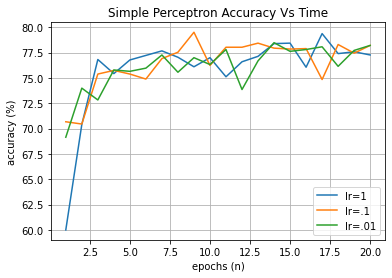

In [619]:
x = np.linspace(1, 20, num=20)
plt.plot(x, ad1, label="lr=1")
plt.plot(x, ad2, label="lr=.1") 
plt.plot(x, ad3, label="lr=.01")
plt.legend()
plt.xlabel('epochs (n)')
plt.ylabel('accuracy (%)')
plt.title('Simple Perceptron Accuracy Vs Time')
plt.grid(True)
plt.savefig("plot_simple.png")
plt.show()

## Best Case, Simple Perceptron

In [620]:
#best lr = .1 on epoch 9, with 5652 updates to reach the best accuracy, 11767 total updates \\ test set accuracy 79.507
print(f"Evaluate best results on Test Set")
eval = np.genfromtxt("test.csv", delimiter=',')
x_eval = eval[:,1:]
y_eval = eval[:,0:1]

#x_eval, y_eval = xy_split(eval)
predictions = perceptron_simple(x_eval, w2, b2)
acc= Accuracy(predictions, y_eval)
print(f"Accuracy on Entire Test Set: {acc[0]}, Ratio = {acc[1]} / {acc[2]}")

Evaluate best results on Test Set
Accuracy on Entire Test Set: 78.13620071684588, Ratio = 436 / 558


# **Decaying LR Perceptron**

## Decaying LR Functions

In [621]:
#the same but the learning rate decays at lr / (1 + epoch)
#finds the weights and bias
def train_weights_decay(features, labels, lr, epochs, test_features, test_labels):
  print("----------------------------------------------------------------------")
  print(f"Decaying LR Perceptron Training - epochs: {epochs}, starting lr: {lr}")
  print("----------------------------------------------------------------------")
  x = features.to_numpy(copy=True)
  y = labels.to_numpy(copy=True)
  test_x = test_features.to_numpy(copy=True)
  test_y = test_labels.to_numpy(copy=True)

  acc = 0
  e = 0 

  best_acc = 0
  best_epoch = 0

  updates = 0
  best_updates = 0

  length = x.shape[1]

  w, b = initialize_weights(length)
  acc_dat = []

  for e in range(1, epochs+1):
    lr_decay = lr / (e) #decay the learning rate

    for i in range(x.shape[0]-1):

      y_prime = predict(x[i,0:length], w, b)
      
      if y_prime < 0 and y[i] > 0:
        w, b = update_weights(w, b, x[i, 0:length], y[i], lr_decay)
        updates = updates + 1
      
      if y_prime > 0 and y[i] < 0:
        w, b = update_weights(w, b, x[i, 0:length], y[i], lr_decay)
        updates = updates + 1
    
    predictions = perceptron_simple(test_x, w, b)
    acc, right, total = Accuracy(predictions, test_y)
    acc_dat.append(acc)

    if acc > best_acc:
      best_acc = acc
      best_epoch = e
      best_w = np.copy(w)
      best_b = b
      best_updates = updates

    print(f"Epoch {e}: Accuracy {acc},  Error: {100-acc}")

  print("----------------------------------------------------------------------")
  print(f"Learning rate = {lr}")
  print(f"Final Results - Accuracy: {acc} Ratio: {right} / {total} on epoch: {e}, Total Updates = {updates}")
  print(f"Best  Results - Accuracy: {best_acc} on epoch: {best_epoch}, Updates to reach highest accuracy = {best_updates}")
  print("----------------------------------------------------------------------")
  print()


  return best_w, best_b, acc_dat

##Hyper Parameter Tuning

In [622]:
epochs = 20
#lr 1
lr = 1
x_train, y_train, x_test, y_test = FoldSelection(folds)
w1, b1, ad1 = train_weights_decay(x_train, y_train, lr, epochs, x_test, y_test)

print()
#lr .1
lr = .1
x_train, y_train, x_test, y_test = FoldSelection(folds)
w2, b2, ad2 = train_weights_decay(x_train, y_train, lr, epochs, x_test, y_test)
print()

#lr .01
lr = .01
x_train, y_train, x_test, y_test = FoldSelection(folds)
w3, b3, ad3 = train_weights_decay(x_train, y_train, lr, epochs, x_test, y_test)

----------------------------------------------------------------------
Decaying LR Perceptron Training - epochs: 20, starting lr: 1
----------------------------------------------------------------------
Epoch 1: Accuracy 63.139013452914796,  Error: 36.860986547085204
Epoch 2: Accuracy 76.41255605381167,  Error: 23.58744394618833
Epoch 3: Accuracy 76.72645739910314,  Error: 23.27354260089686
Epoch 4: Accuracy 79.5067264573991,  Error: 20.493273542600903
Epoch 5: Accuracy 77.9372197309417,  Error: 22.062780269058294
Epoch 6: Accuracy 79.19282511210763,  Error: 20.807174887892373
Epoch 7: Accuracy 79.32735426008969,  Error: 20.67264573991031
Epoch 8: Accuracy 78.96860986547085,  Error: 21.031390134529147
Epoch 9: Accuracy 79.19282511210763,  Error: 20.807174887892373
Epoch 10: Accuracy 80.62780269058297,  Error: 19.372197309417032
Epoch 11: Accuracy 79.64125560538116,  Error: 20.35874439461884
Epoch 12: Accuracy 81.0762331838565,  Error: 18.923766816143498
Epoch 13: Accuracy 80.4484304932

##Plot

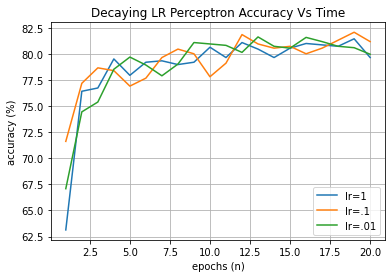

In [623]:
x = np.linspace(1, 20, num=20)
plt.plot(x, ad1, label="lr=1")
plt.plot(x, ad2, label="lr=.1") 
plt.plot(x, ad3, label="lr=.01")
plt.legend()
plt.xlabel('epochs (n)')
plt.ylabel('accuracy (%)')
plt.title('Decaying LR Perceptron Accuracy Vs Time')
plt.grid(True)
plt.savefig("plot_decay.png")
plt.show()

##Best Case Decaying LR Perceptron

In [624]:
#best starting lr = .1 on Epoch 19, 9514 updates \\ total = 9978 \\  82.063 test set accuracy
print(f"Evaluate best results on Test Set")
eval = np.genfromtxt("test.csv", delimiter=',')
x_eval = eval[:,1:]
y_eval = eval[:,0:1]

predictions = perceptron_simple(x_eval, w2, b2)
acc = Accuracy(predictions, y_eval)

print(f"Evaluate best results on Test Set")
print(f"Accuracy on Entire Test Set: {acc[0]}, Ratio = {acc[1]} / {acc[2]}")

Evaluate best results on Test Set
Evaluate best results on Test Set
Accuracy on Entire Test Set: 77.41935483870968, Ratio = 432 / 558


# **Averaged Perceptron**

## Averaged Perceptron Functions

In [625]:
def train_weights_avg(features, labels, lr, epochs, test_features, test_labels):
  print("----------------------------------------------------------------------")
  print(f"Averaged Perceptron Training - epochs: {epochs}, lr: {lr}")
  print("----------------------------------------------------------------------")

  x = features.to_numpy(copy=True)
  y = labels.to_numpy(copy=True)
  test_x = test_features.to_numpy(copy=True)
  test_y = test_labels.to_numpy(copy=True)

  acc = 0
  e = 0 

  updates = 0
  length = x.shape[1]

  w, b = initialize_weights(length)
  a = np.zeros((w.shape[1], 1))
  b_a = 0
  divisor = 0

  acc_dat = []

  for e in range(1, epochs+1):
    for i in range(x.shape[0]-1):

      y_prime = predict(x[i,0:length], w, b)
      
      if y_prime < 0 and y[i] > 0:
        w, b = update_weights(w, b, x[i, 0:length], y[i], lr)
        updates = updates + 1
      
      if y_prime > 0 and y[i] < 0:
        w, b = update_weights(w, b, x[i, 0:length], y[i], lr)
        updates = updates + 1
      
      a = a + w
      b_a = b_a + b
      divisor += 1

    predictions = perceptron_simple(test_x, a / (divisor), b_a/(divisor))
    acc, right, total = Accuracy(predictions, test_y)

    acc_dat.append(acc)

    print(f"Epoch {e}: Accuracy {acc},  Error: {100-acc}")
    
  #find the averaged version and return  

  print("----------------------------------------------------------------------")
  print(f"Learning rate = {lr}")
  print(f"Final Results - Accuracy: {acc} Ratio: {right} / {total} on epoch: {e}")
  print(f"Total number of updates = {updates}")
  print("----------------------------------------------------------------------")
  print()
  

  return a/divisor, b_a/divisor, acc_dat

##Hyper Parameter Tuning

In [626]:
epochs = 20
#lr 1
lr = 1
x_train, y_train, x_test, y_test = FoldSelection(folds)
w1, b1, ad1 = train_weights_avg(x_train, y_train, lr, epochs, x_test, y_test)

print()
#lr .1
lr = .1
x_train, y_train, x_test, y_test = FoldSelection(folds)
w2, b2, ad2 = train_weights_avg(x_train, y_train, lr, epochs, x_test, y_test)
print()

#lr .01
lr = .01
x_train, y_train, x_test, y_test = FoldSelection(folds)
w3, b3, ad3 = train_weights_avg(x_train, y_train, lr, epochs, x_test, y_test)

----------------------------------------------------------------------
Averaged Perceptron Training - epochs: 20, lr: 1
----------------------------------------------------------------------
Epoch 1: Accuracy 76.09865470852017,  Error: 23.901345291479828
Epoch 2: Accuracy 78.56502242152466,  Error: 21.43497757847534
Epoch 3: Accuracy 79.77578475336323,  Error: 20.224215246636774
Epoch 4: Accuracy 80.44843049327353,  Error: 19.551569506726466
Epoch 5: Accuracy 80.80717488789237,  Error: 19.192825112107627
Epoch 6: Accuracy 80.80717488789237,  Error: 19.192825112107627
Epoch 7: Accuracy 81.39013452914799,  Error: 18.609865470852014
Epoch 8: Accuracy 81.25560538116592,  Error: 18.74439461883408
Epoch 9: Accuracy 81.43497757847533,  Error: 18.565022421524674
Epoch 10: Accuracy 81.61434977578476,  Error: 18.38565022421524
Epoch 11: Accuracy 81.70403587443946,  Error: 18.295964125560545
Epoch 12: Accuracy 81.61434977578476,  Error: 18.38565022421524
Epoch 13: Accuracy 81.52466367713005,  Err

## Plot

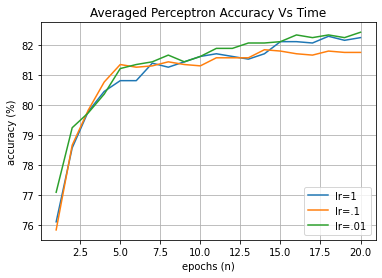

In [635]:
x = np.linspace(1, 20, num=20)
plt.plot(x, ad1, label="lr=1")
plt.plot(x, ad2, label="lr=.1") 
plt.plot(x, ad3, label="lr=.01")
plt.legend()
plt.xlabel('epochs (n)')
plt.ylabel('accuracy (%)')
plt.title('Averaged Perceptron Accuracy Vs Time')
plt.grid(True)
plt.savefig("plot_avg.png")
plt.show()

##Best Case - Averaged Perceptron

In [628]:
#best lr = .01 with 11777 updates after 20 epochs \\ test set accuracy 82.422
print(f"Evaluate best results on Test Set")
eval = np.genfromtxt("test.csv", delimiter=',')
x_eval = eval[:,1:]
y_eval = eval[:,0:1]

predictions = perceptron_simple(x_eval, w3, b3)
acc = Accuracy(predictions, y_eval)

print(f"Evaluate best results on Test Set")
print(f"Accuracy on Entire Test Set: {acc[0]}, Ratio = {acc[1]} / {acc[2]}")

Evaluate best results on Test Set
Evaluate best results on Test Set
Accuracy on Entire Test Set: 79.56989247311827, Ratio = 444 / 558


# **Majority Baseline**

##Functions

In [629]:
def majority_baseline(train_y, test_y):

  ##find majority in training set
  num_hot, num_cold = 0, 0
  for i in range(train_y.shape[0]-1):
    token = train_y[i]

    if token == 1:
      num_hot = num_hot + 1
    else:
      num_cold = num_cold + 1

  if num_hot > num_cold:
    majority = 1
  else:
    majority = -1

  correct = 0
  
  ##test accuracy on test set
  for i in range(test_y.shape[0]-1):
    if test_y[i] == majority:
      correct = correct + 1


  return majority, correct/test_y.shape[0] * 100

##Best Case Majority Baseline

The majority baseline should predict 1, with test accuracy: 54.121863799283155


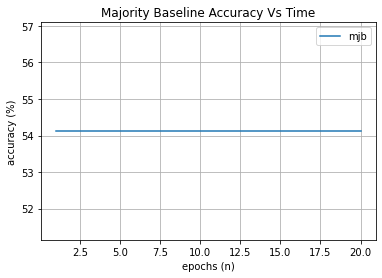

In [630]:
train = np.genfromtxt("train.csv", delimiter=',')
test = np.genfromtxt("test.csv", delimiter=',')

train_y = train[:,0]
test_y = test[:,0]

maj, acc = majority_baseline(train_y, test_y)
print(f"The majority baseline should predict {maj}, with test accuracy: {acc}")

x = np.linspace(1, 20, num=20)
y = np.full(20, acc)
plt.plot(x, y, label="mjb")
plt.legend()
plt.xlabel('epochs (n)')
plt.ylabel('accuracy (%)')
plt.title('Majority Baseline Accuracy Vs Time')
plt.grid(True)
plt.savefig("plot_mjb.png")
plt.show()